Lab 2 Submission
Team: Shreya Kulkarni and Karan Deepak Kanwar

In [ ]:
from tensorflow.python.client import device_lib
print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13302920 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10111876131546152006
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4456333989818020842
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#/content/gdrive/MyDrive/Lab2:Colab

In [ ]:
import time
start = time.time()
!python3 "/content/gdrive/MyDrive/mnist_cnn.py"
end = time.time()
print(end - start)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2022-03-28 00:18:47.696681: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/12
375/375 [==============================] - 11s 21ms/step - loss: 0.2856 - accuracy: 0.9123 - val_loss: 0.0674 - val_accuracy: 0.9809
Epoch 2/12
375/375 [==============================] - 8s 20ms/step - loss: 0.0971 - accuracy: 0.9706 - val_loss: 0.0497 - val_accuracy: 0.9859
Epoch 3/12
375/375 [==============================] - 7s 18ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0431 - val_accuracy: 0.9870
Epoch 4/12
375/375 [==============================] - 6s 16ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0400 - val_accuracy: 0.9878
Epoch 5/12
375/375 [==============================] - 6s 16ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0435 - val_accuracy: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Q2- Explain the way that this model is designed. Talk about all the layers and their functionality. <br>
Answer 2 This is a sequential model. Under this model we have 2D convolution layers, with a kernel_size of (3,3). Here we have one hidden later of node size 128. We allso have a dropout level of 0.5. Usually we add a dropout layer to reduce overfitting in our models. <br>
Our activation function is rectified linear activation function which is relu. <br> It is  piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 13s 24ms/step - loss: 0.2787 - accuracy: 0.9141 - val_loss: 0.0641 - val_accuracy: 0.9808
Epoch 2/12
375/375 [==============================] - 8s 21ms/step - loss: 0.0925 - accuracy: 0.9722 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 3/12
375/375 [==============================] - 6s 16ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 4/12
375/375 [==============================] - 6s 17ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 5/12
375/375 [==============================] - 7s 20ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 6/12
375/375 [==============================] - 6s 17ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 7/12
375/375 [==============================] - 6s 17ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.0347 - val_accuracy: 0.989

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03345086798071861
Test accuracy: 0.9914000034332275


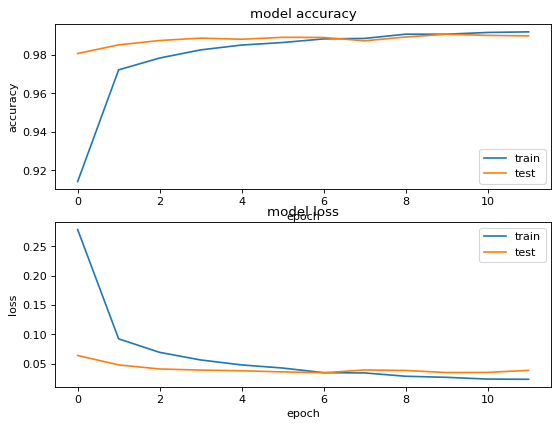

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


Q3- Design the learning curve and talk about what you see.<br>
Answer 03 <br>
Above is the learning curve. <br>
This is neither a case of underfit or overfit.The above learning curve shows us the changes in learning performance of our model as epochs increments. There are two graphs one for the accuracy and one for loss. We can see, this model shows a decent food performance with no resulting overfit or underfit case.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

In [ ]:
print(df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


In [ ]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [ ]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
sentences = df['sentence'].values
y = df['label'].values

In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [ ]:
print("Accuracy:", score)

Accuracy: 0.796


In [ ]:
X_train = vectorizer.transform(sentences_train).toarray()
X_test = vectorizer.transform(sentences_test).toarray()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
input_dim = X_train.shape[1] # Number of features

In [ ]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, validation_split=0.2 , batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 0.6817 - accuracy: 0.5750 - val_loss: 0.6699 - val_accuracy: 0.6867
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7883 - val_loss: 0.6361 - val_accuracy: 0.7933
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.8950 - val_loss: 0.5880 - val_accuracy: 0.8333
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.9483 - val_loss: 0.5372 - val_accuracy: 0.8267
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.9717 - val_loss: 0.4967 - val_accuracy: 0.8333
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.9817 - val_loss: 0.4641 - val_accuracy: 0.8333
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.9867 - val_loss: 0.4418 - val_accuracy: 0.8400
Epoch 8/100
6

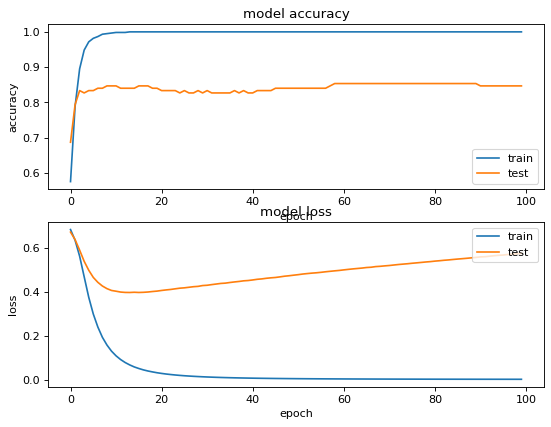

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


Q4- Explain these graphs. If you see any issue, suggest a solution to resolve it. Make the model by creating 3 hidden layers (first one 200 nodes, second one 100 nodes and last one 50 nodes and after each step, add dropout of 0.2 and report the accuracy. <br>
Answer 4 <br>
In the graph above we see a case of overfitting. This means the model that we have trained knows the data too well. <br>
Overfitting can be handled by removing layers and or by reducind the hidden layer elements. <br>
Here we can also add dropout layers and then measure the acccuracy and then adjust more if needed. <br>

In [ ]:
X_train.shape

(750, 1546)

In [ ]:
y_train.shape

(750,)

Below is the model for first one 200 nodes, second one 100 nodes and last one 50 nodes and after each step, add dropout of 0.2 and report the accuracy.



In [ ]:
model2 = Sequential()
model2.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                15470     
                                                                 
 dense_23 (Dense)            (None, 200)               2200      
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               20100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dropout_13 (Dropout)        (None, 50)               

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model2.fit(X_train, y_train, epochs=100, validation_split=0.2 , batch_size=10)
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 1s 8ms/step - loss: 0.6915 - accuracy: 0.5300 - val_loss: 0.6785 - val_accuracy: 0.6600
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7483 - val_loss: 0.4833 - val_accuracy: 0.7867
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1881 - accuracy: 0.9433 - val_loss: 0.4877 - val_accuracy: 0.8067
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9833 - val_loss: 0.5398 - val_accuracy: 0.8133
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9933 - val_loss: 0.6022 - val_accuracy: 0.8067
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.6697 - val_accuracy: 0.8133
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7196 - val_accuracy: 0.8133
Epoch 8/100
6

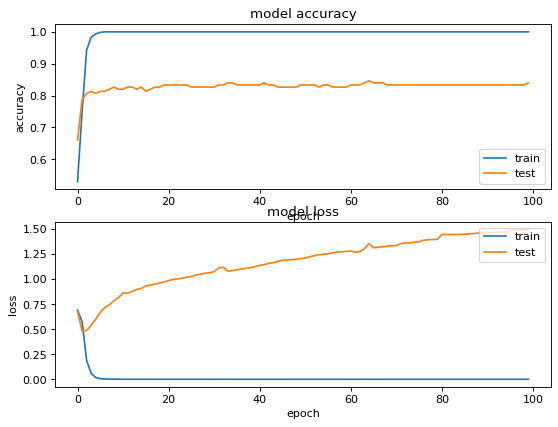

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

There is still overfitting. Add more content here.

In [ ]:
X_train = vectorizer.transform(sentences_train).toarray()
X_test = vectorizer.transform(sentences_test).toarray()

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index

In [ ]:
print(sentences_train[3])
print(X_train[3])

This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


In [ ]:
for word in ['the', 'all', 'happy']:
  print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 100

In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
embedding_dim = 50

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           78700     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)


Epoch 1/50
60/60 [==============================] - 1s 8ms/step - loss: 0.6897 - accuracy: 0.5383 - val_loss: 0.6838 - val_accuracy: 0.7400
Epoch 2/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6668 - accuracy: 0.8933 - val_loss: 0.6624 - val_accuracy: 0.7733
Epoch 3/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.9383 - val_loss: 0.6177 - val_accuracy: 0.7867
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 0.5173 - accuracy: 0.9517 - val_loss: 0.5485 - val_accuracy: 0.7933
Epoch 5/50
60/60 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.9617 - val_loss: 0.4835 - val_accuracy: 0.8067
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.9683 - val_loss: 0.4369 - val_accuracy: 0.8267
Epoch 7/50
60/60 [==============================] - 0s 5ms/step - loss: 0.1646 - accuracy: 0.9750 - val_loss: 0.4050 - val_accuracy: 0.8333
Epoch 8/50
60/60 [==

In [ ]:
print("Accuracy: ",accuracy)

Accuracy:  0.8320000171661377


Q5- How do you interpret these results? <br>
Answer 5: We can interupt the results by drawing the learning curves to read. We can print the accuracy. The accuracy rate and learning curves will help us understand if our neural model is perfoming good. We need to make sure if the traing accuracy goes up and test loss is low.  <br>
Q6- What is your recommendation to improve the accuracy? Implement your idea.<br>
Answer 6: To improve the accuracy, we can add more hidden layers and dropout layers

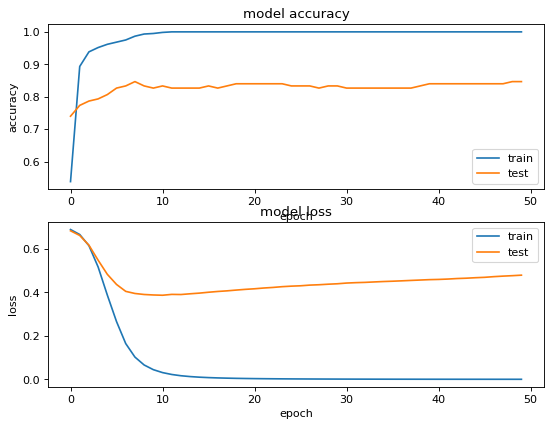

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size,
output_dim=embedding_dim,
input_length=maxlen))
model3.add(layers.GlobalMaxPool1D())
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 50)           78700     
                                                                 
 global_max_pooling1d_19 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 1)                 51        
                                                                 
Total params: 81,301
Trainable params: 81,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model3.fit(X_train, y_train,
epochs=50,
validation_split=0.2,
batch_size=10)
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)

Epoch 1/20
60/60 [==============================] - 1s 13ms/step - loss: 6.5801e-05 - accuracy: 1.0000 - val_loss: 0.5386 - val_accuracy: 0.8200
Epoch 2/20
60/60 [==============================] - 1s 10ms/step - loss: 6.2087e-05 - accuracy: 1.0000 - val_loss: 0.5404 - val_accuracy: 0.8200
Epoch 3/20
60/60 [==============================] - 0s 8ms/step - loss: 5.8639e-05 - accuracy: 1.0000 - val_loss: 0.5418 - val_accuracy: 0.8200
Epoch 4/20
60/60 [==============================] - 0s 8ms/step - loss: 5.5434e-05 - accuracy: 1.0000 - val_loss: 0.5431 - val_accuracy: 0.8200
Epoch 5/20
60/60 [==============================] - 0s 8ms/step - loss: 5.2492e-05 - accuracy: 1.0000 - val_loss: 0.5457 - val_accuracy: 0.8200
Epoch 6/20
60/60 [==============================] - 1s 9ms/step - loss: 4.9758e-05 - accuracy: 1.0000 - val_loss: 0.5478 - val_accuracy: 0.8200
Epoch 7/20
60/60 [==============================] - 1s 8ms/step - loss: 4.7130e-05 - accuracy: 1.0000 - val_loss: 0.5501 - val_accurac

In [ ]:
print("Accuracy: ",accuracy)

Accuracy:  0.7879999876022339
